# Definitions of xG Analysis

## xgoals (xG) Definition

The expected goals (xG) are the number of goals that can be expected to be scored based on where and how a shot was taken. In this code the xG data for the 22/23 season were obtained from <a href="https://understat.com/league/EPL/2021">understat</a>.

## xGs Difference (ΔxG) Definition 

The xgoals difference (ΔxG) corresponds to the difference between the xG of a team minus the xG of the opponent on a particular match, i.e.  $\Delta xG=xG-xG_{allowed}$. This is a qualitative metric that in reality represents how much better was the team in question in this particular match.

## Mean xGs Difference (ΔxG<sub>m</sub>) Definition 

The mean xgoals difference $\Delta xG_m$ corresponds to the mean value of the ΔxG metric. This metric corresponds to a specific number that shows how much better was the team in question from its opponent throughout the 22/23 season.

# Libraries & Options

## Libraries 

In [1]:
# import the basic libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
# option to avoid a warning
pd.options.mode.chained_assignment = None

## Options 

In [2]:
# total number of matches
n=38
# The width of each bar in the Bar Plots that follow
width = 0.25
# x Axis Labels for all Bar Plot that follow
x_ticks = [str(x) for x in range(1,39)]
x_axis = np.arange(len(x_ticks))

# y Axis Labels for the Bar Plot of Manchester United
y_ticks_mu = [str(x) for x in range(6)]
y_axis_mu = np.arange(len(y_ticks_mu)) 
# y Axis Labels for the Bar Plot of Manchester City
y_ticks_mc = [str(x) for x in range(6)]
y_axis_mc = np.arange(len(y_ticks_mc))  
# y Axis Labels for the Bar Plot of Liverpool
y_ticks_liv = [str(x) for x in range(9)]
y_axis_liv = np.arange(len(y_ticks_liv))  

# Main Analysis

In [3]:
# class to read the excel where the data are stored and calculates the basic quantities
class DataRead:
    def __init__(self, excel_path, sheet_name):
        self.excel_path = excel_path
        self.sheet_name = sheet_name

    def xGfunction(self):
        try:
            # read the excel data file
            df = pd.read_excel(self.excel_path, sheet_name=self.sheet_name)
            # creation of lists of the basic quantites
            matchweek = df.iloc[:, 0].tolist()
            goals_scored = df.iloc[:, 1].tolist()
            xG = df.iloc[:, 2].tolist()
            goals_concede = df.iloc[:, 3].tolist()
            xG_allowed = df.iloc[:, 4].tolist()
            vs = df.iloc[:, 5].tolist()
            # calculation of the xG difference ΔxG
            dxg = [a - b for a, b in zip(xG, xG_allowed)]
            # calculation of matches in which ΔxG>0
            dxg_pos = len([index for index in dxg if index >= 0])
            # calculation of matches in which ΔxG<0
            dxg_neg = len([index for index in dxg if index < 0])
            # calculation of percentage where ΔxG>0
            chances = "{:.2f}".format(100*dxg_pos/n)
            # sum of goals that the team scored
            sum_of_goals = df.iloc[:, 1].sum()
            # sum of the xG of the team
            sum_of_xG_frm = df.iloc[:, 2].sum()
            sum_of_xG = "{:.2f}".format(sum_of_xG_frm)
            
            return goals_scored, xG, dxg, sum_of_goals, sum_of_xG, chances
        
        except Exception as e:
            return f"An error occurred: {str(e)}"

In [4]:
# class to read the excel where the data of the top 4 teams are stored and calculates the basic quantities
class DataReadtop4:
    def __init__(self, excel_path_top4, sheet_name_top4, columnxG_top4, columnxG_all_top4, teams_top4):
        self.excel_path_top4 = excel_path_top4
        self.sheet_name_top4 = sheet_name_top4
        self.columnxG_top4 = columnxG_top4
        self.columnxG_all_top4 = columnxG_all_top4
        self.teams_top4 = teams_top4

    def xGfuntion_top4(self):
        try:
            # read the excel data file 
            df = pd.read_excel(self.excel_path_top4, sheet_name=self.sheet_name_top4)
            # create the subfiles for the top 4 teams
            top4_df = df[df['vs'].str.contains(self.teams_top4)]
            # calculation of the xG difference ΔxG for the top 4 teams
            xG_top4 = top4_df[self.columnxG_top4]
            xG_allowed_top4 = top4_df[self.columnxG_all_top4]
            dxg_top4 = [a - b for a, b in zip(xG_top4, xG_allowed_top4)]
            # calculation of matches in which ΔxG>0 vs the top 4 teams
            dxg_pos_top4 = len([index for index in dxg_top4 if index > 0])
            # calculation of percentage where ΔxG>0 vs the top 4 teams
            chances_top4 = "{:.1f}".format(100*dxg_pos_top4/n_top4)
            
            return chances_top4, dxg_pos_top4
        
        except Exception as e:
            return f"An error occurred: {str(e)}"

In [5]:
# specify the directory of the data. This should be changed to your path.
directory = os.getcwd()
excel_path = os.path.join(directory, "2022_2023_Data/Data.xlsx")
excel_path_top4 = excel_path
columnxG_top4 = 'xgoals'
columnxG_all_top4 = 'xgoals_allowed'

## Manchester United - xG Analysis

In [6]:
n_top4 = 6
# specify the sheet name. Notice that each sheet corresponds to a different team
sheet_name = 'Manchester_United_Data'
sheet_name_top4 = sheet_name
teams_top4 = 'Manchester_City|Arsenal|Newcastle'

data_imp = DataRead(excel_path, sheet_name)
result = data_imp.xGfunction()
goals_scored_list, xG_list, dxg_mu, sum_of_goals, sum_of_xG, chances = result

data_imp_top4 = DataReadtop4(excel_path_top4, sheet_name_top4, columnxG_top4, columnxG_all_top4, teams_top4)
result_top4 = data_imp_top4.xGfuntion_top4()
chances_top4, dxg_pos_top4= result_top4
chances_mu = [chances_top4,100-100*dxg_pos_top4/n_top4]

In [7]:
print("Manchester United in the 22/23 season according to the xG analysis should had scored", sum_of_xG,"and scored", sum_of_goals,"goals.")
print("Manchester United in the 22/23 season according to the xG analysis created better chances in",chances,"% of the total matches.")
print("Manchester United in the 22/23 season according to the xG analysis had ΔxG>0 against top 4 league teams in",chances_top4,"%  of the total matches given.")

Manchester United in the 22/23 season according to the xG analysis should had scored 71.91 and scored 58 goals.
Manchester United in the 22/23 season according to the xG analysis created better chances in 63.16 % of the total matches.
Manchester United in the 22/23 season according to the xG analysis had ΔxG>0 against top 4 league teams in 50.0 %  of the total matches given.


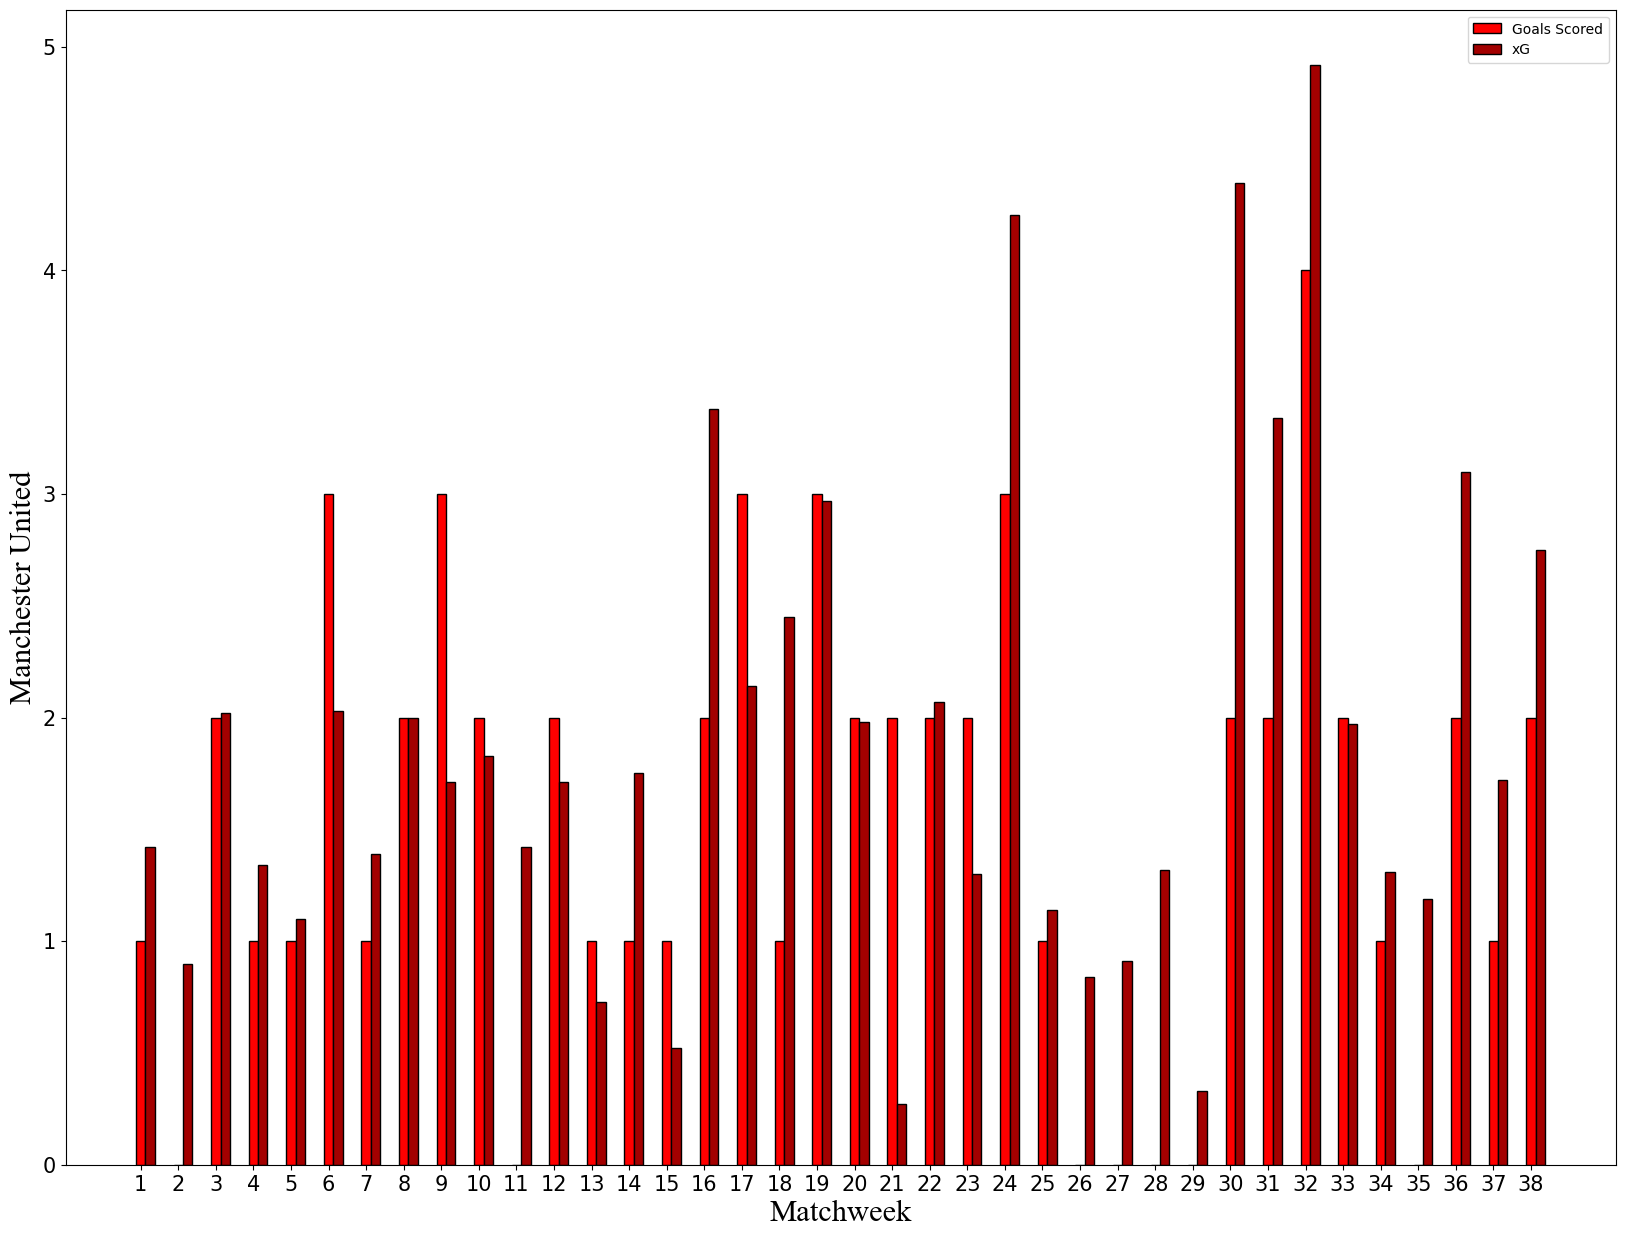

In [8]:
# Bar Plot for Manchester United
x = np.arange(n) 

# Size of the figure
plt.rcParams["figure.figsize"] = (20, 15)
    
plt.bar(x, goals_scored_list, color = 'r',
        width = width, edgecolor = 'black',
        label='Goals Scored')

plt.bar(x + width, xG_list, color = (0.64, 0, 0),
        width = width, edgecolor = 'black',
        label='xG')
  
plt.xticks(x_axis, x_ticks, fontsize = 15)   
plt.yticks(y_axis_mu, y_ticks_mu, fontsize = 15)   
plt.xlabel("Matchweek", fontdict = {'family':'Times New Roman','size':22})
plt.ylabel("Manchester United", fontdict = {'family':'Times New Roman','size':22})

plt.legend()
plt.show()

## Manchester City - xG Analysis

In [9]:
# specify the sheet name. Notice that each sheet corresponds to a different team
sheet_name = 'Manchester_City_Data'
sheet_name_top4 = sheet_name
teams_top4 = 'Manchester_United|Arsenal|Newcastle'


data_imp = DataRead(excel_path, sheet_name)
result = data_imp.xGfunction()
goals_scored_list, xG_list, dxg_mc, sum_of_goals, sum_of_xG, chances = result

data_imp_top4 = DataReadtop4(excel_path_top4, sheet_name_top4, columnxG_top4, columnxG_all_top4, teams_top4)
result_top4 = data_imp_top4.xGfuntion_top4()
chances_top4, dxg_pos_top4= result_top4
chances_mc = [chances_top4,100-100*dxg_pos_top4/n_top4]

In [10]:
print("Manchester City in the 22/23 season according to the xG analysis should had scored", sum_of_xG,"and scored", sum_of_goals,"goals.")
print("Manchester City in the 22/23 season according to the xG analysis created better chances in",chances,"% of the total matches.")
print("Manchester City in the 22/23 season according to the xG analysis had ΔxG>0 against top 4 league teams in",chances_top4,"%  of the total matches given.")

Manchester City in the 22/23 season according to the xG analysis should had scored 84.31 and scored 94 goals.
Manchester City in the 22/23 season according to the xG analysis created better chances in 78.95 % of the total matches.
Manchester City in the 22/23 season according to the xG analysis had ΔxG>0 against top 4 league teams in 83.3 %  of the total matches given.


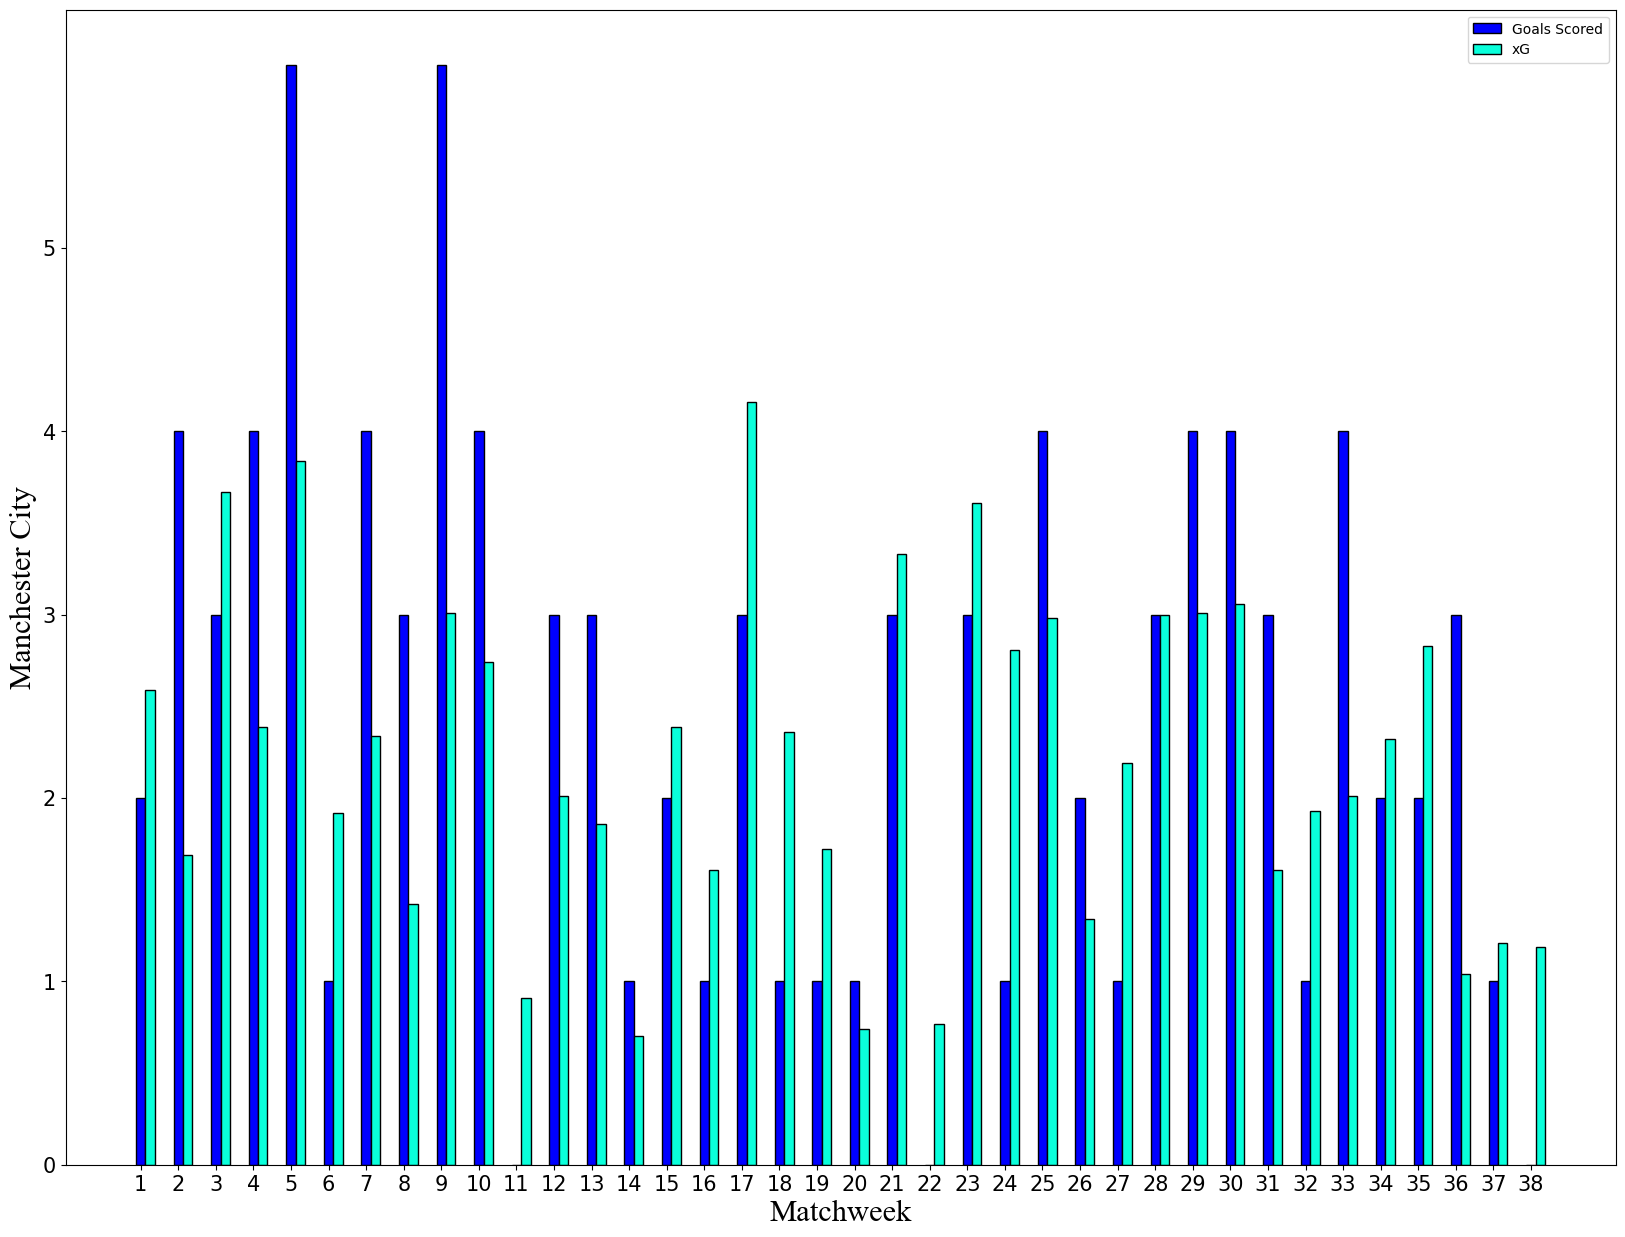

In [11]:
plt.bar(x, goals_scored_list, color = 'b',
        width = width, edgecolor = 'black',
        label='Goals Scored')

plt.bar(x + width, xG_list, color = (0.04, 1., 0.86),
        width = width, edgecolor = 'black',
        label='xG')
  
plt.xticks(x_axis, x_ticks, fontsize = 15)   
plt.yticks(y_axis_mc, y_ticks_mc, fontsize = 15)   
plt.xlabel("Matchweek", fontdict = {'family':'Times New Roman','size':22})
plt.ylabel("Manchester City", fontdict = {'family':'Times New Roman','size':22})

plt.legend()
plt.show()

## Liverpool - xG Analysis

In [12]:
n_top4 = 8
# specify the sheet name. Notice that each sheet corresponds to a different team
sheet_name = 'Liverpool_Data'
sheet_name_top4 = sheet_name
teams_top4 = 'Manchester_City|Arsenal|Manchester_United|Newcastle'


data_imp = DataRead(excel_path, sheet_name)
result = data_imp.xGfunction()
goals_scored_list, xG_list, dxg_liv, sum_of_goals, sum_of_xG, chances = result

data_imp_top4 = DataReadtop4(excel_path_top4, sheet_name_top4, columnxG_top4, columnxG_all_top4, teams_top4)
result_top4 = data_imp_top4.xGfuntion_top4()
chances_top4, dxg_pos_top4 = result_top4
chances_liv = [chances_top4,100-100*dxg_pos_top4/n_top4]

In [13]:
print("Liverpool in the 22/23 season according to the xG analysis should had scored", sum_of_xG,"and scored", sum_of_goals,"goals.")
print("Liverpool in the 22/23 season according to the xG analysis created better chances in",chances,"% of the total matches.")
print("Liverpool in the 22/23 season according to the xG analysis had ΔxG>0 against top 4 league teams in",chances_top4,"%  of the total matches given.")

Liverpool in the 22/23 season according to the xG analysis should had scored 80.75 and scored 75 goals.
Liverpool in the 22/23 season according to the xG analysis created better chances in 68.42 % of the total matches.
Liverpool in the 22/23 season according to the xG analysis had ΔxG>0 against top 4 league teams in 62.5 %  of the total matches given.


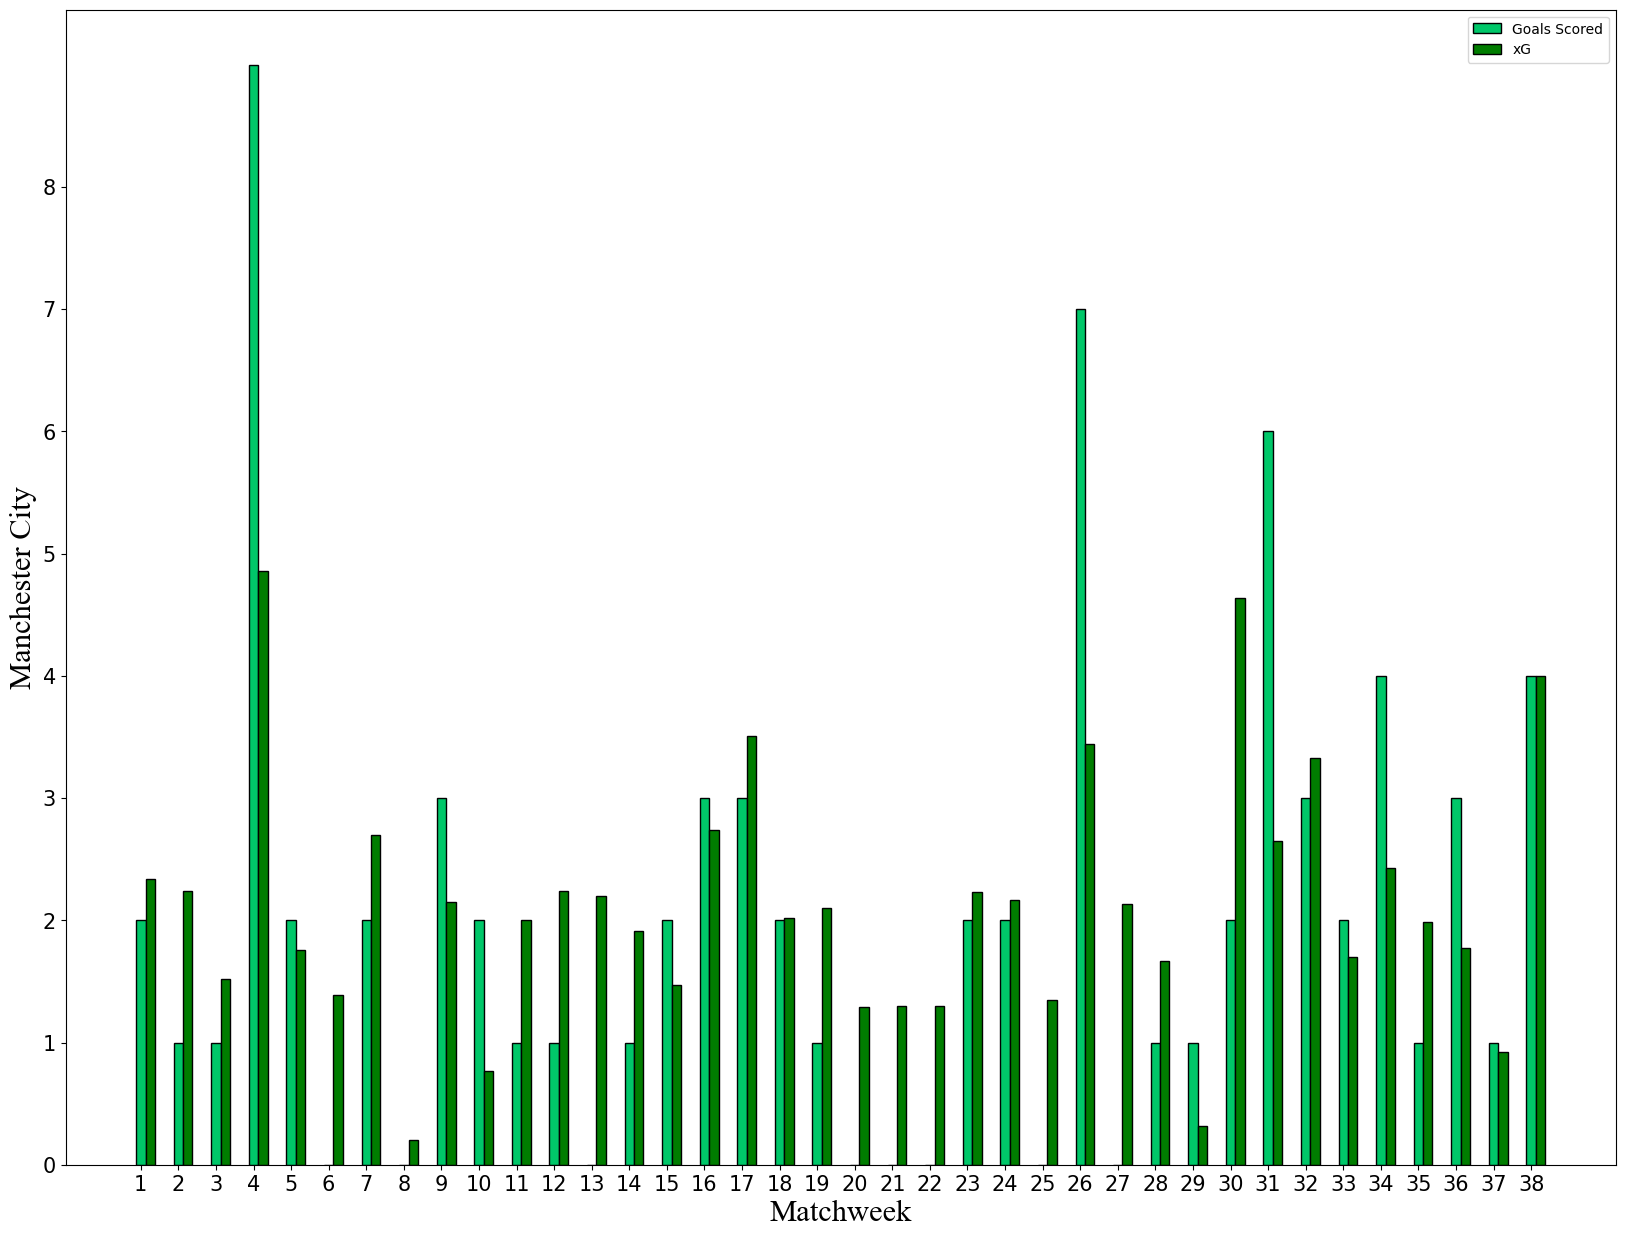

In [14]:
plt.bar(x, goals_scored_list, color = (0, 0.78, 0.41),
        width = width, edgecolor = 'black',
        label='Goals Scored')

plt.bar(x + width, xG_list, color = (0, 0.49, 0),
        width = width, edgecolor = 'black',
        label='xG')
  
plt.xticks(x_axis, x_ticks, fontsize = 15)   
plt.yticks(y_axis_liv, y_ticks_liv, fontsize = 15)   
plt.xlabel("Matchweek", fontdict = {'family':'Times New Roman','size':22})
plt.ylabel("Manchester City", fontdict = {'family':'Times New Roman','size':22})

plt.legend()
plt.show()

# Combined Plots

## Pie Chart Plot

In [15]:
labelsmu = 'Manchester United ΔxG>0 from its opponent (against top 4 clubs)', 'Manchester United ΔxG<0 from its opponent (against top 4 clubs)'
colorsmu = [(1., 0.6, 0.57), (1., 0.25, 0.18)] 
labelsmc = 'Manchester City ΔxG>0 from its opponent (against top 4 clubs)', 'Manchester City ΔxG<0 from its opponent (against top 4 clubs)'
colorsmc = [(0.04, 1., 0.86), 'b'] 
labelsliv = 'Liverpool ΔxG>0 from its opponent (against top 4 clubs)', 'Liverpool ΔxG<0 from its opponent (against top 4 clubs)'
colorsliv = [(0.5, 0.93, 0.24), (0.24, 0.8, 0.56)]
plt.rcParams["figure.figsize"] = (10, 5) 

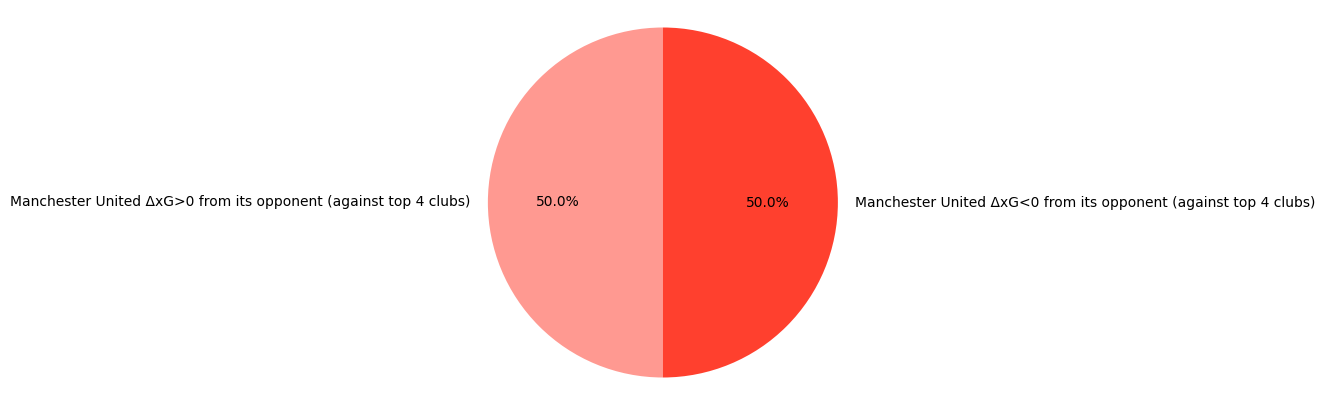

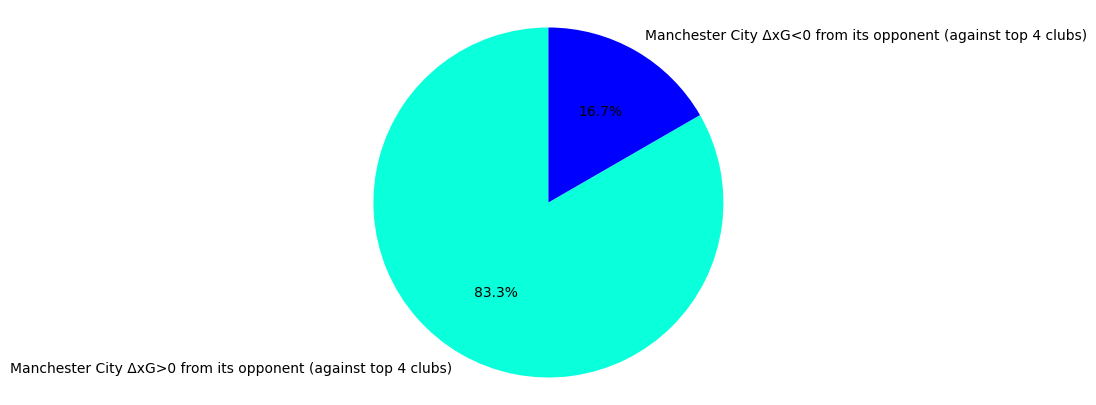

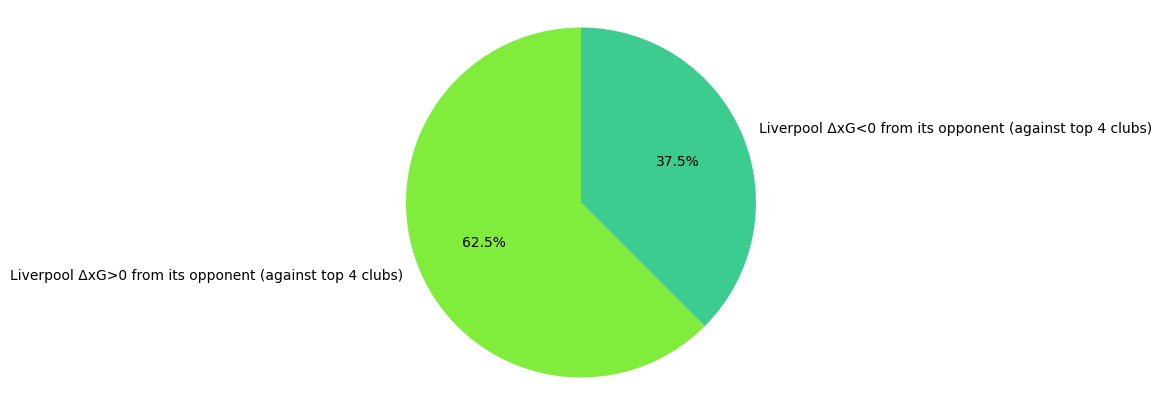

In [16]:
fig1, ax1 = plt.subplots()
ax1.pie(chances_mu, labels=labelsmu, colors=colorsmu, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig2, ax2 = plt.subplots()
ax2.pie(chances_mc, labels=labelsmc, colors=colorsmc, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig3, ax3 = plt.subplots()
ax3.pie(chances_liv, labels=labelsliv, colors=colorsliv, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## ΔxG Plot 

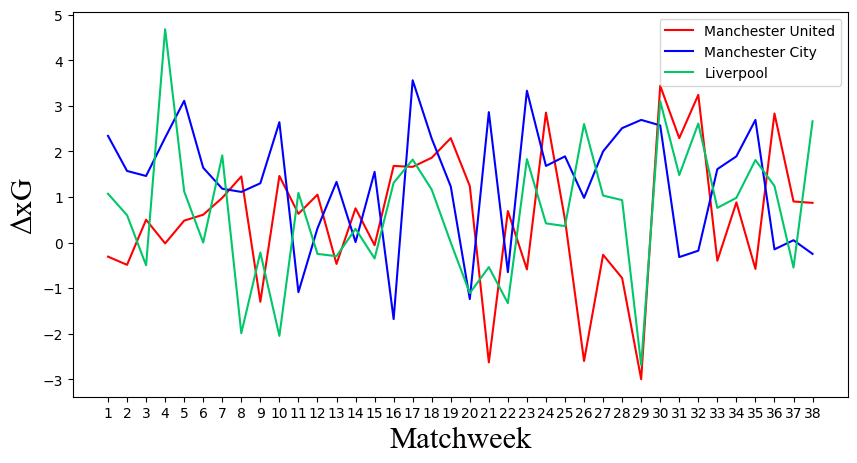

In [17]:
y1_mu = dxg_mu
y2_mc = dxg_mc
y3_liv = dxg_liv

plt.xticks(x_axis, x_ticks, fontsize = 10)   
plt.xlabel("Matchweek", fontdict = {'family':'Times New Roman','size':22})
plt.ylabel("ΔxG", fontdict = {'family':'Times New Roman','size':22})

plt.plot(x, y1_mu, color='r', label='Manchester United')
plt.plot(x, y2_mc, color='b', label='Manchester City')
plt.plot(x, y3_liv, color=(0, 0.78, 0.41), label='Liverpool')
plt.legend()


## ΔxG<sub>m</sub> Plot

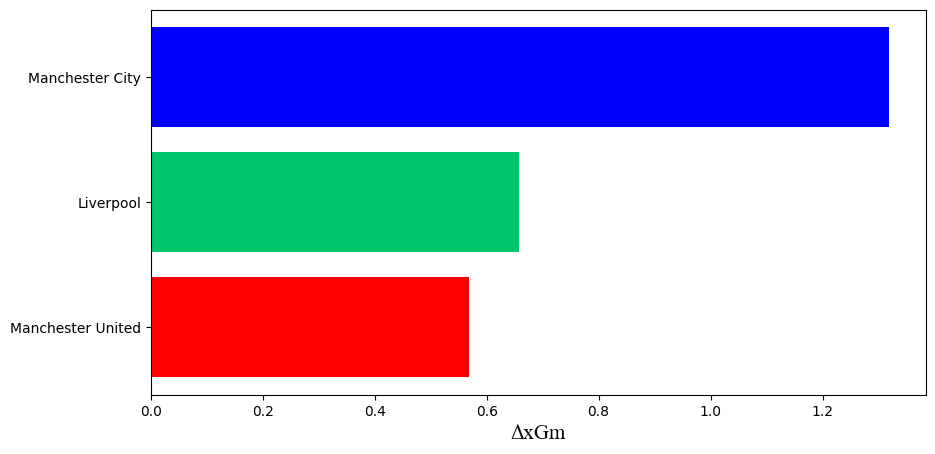

In [18]:
# calculation of  the mean values of the three teams
mean_mu=stat.mean(dxg_mu)
mean_mc=stat.mean(dxg_mc)
mean_liv=stat.mean(dxg_liv)
x_axis_mean = np.array(['Manchester United', 'Liverpool', 'Manchester City'])
y_axis_mean = np.array([mean_mu,mean_liv,mean_mc])
color = ['red', (0, 0.78, 0.41), 'blue']

plt.xlabel("ΔxGm",fontdict = {'family':'Times New Roman','size':15})

plt.barh(x_axis_mean, y_axis_mean, color = color)
plt.show()